In [1]:
# Plot ad hoc mnist instances
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt
import numpy as np
import pandas as pd
import time
import random
import math
from scipy.optimize import minimize

In [2]:
# load (downloaded if needed) the MNIST dataset
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
#y_train = np.array(df['label'].values)
#print(y_train)
k = 0
X_train = (train.iloc[:,1:].values.astype('float32'))
y_train = (train.iloc[:,0].values.astype('int32'))
y_train = np.tile(y_train, (1, 1))
X_test = test.values.astype('float32')
# X_train = X_train.reshape(X_train.shape[0], 28, 28)
#net = NeuralNet([784, 30, 10])


In [3]:
#print(X_train.shape[1])

In [4]:
class Neural_Network:
    def __init__(self,X,y):
        self.m = X_train.shape[0]
        self.input_layer_size = X_train.shape[1]
        self.hidden_layer_size = 25
        self.output_layer_size = 10
        self.epsilon = []
        self.J = 0
        self.grad = 0
        self.num_labels = 10
        self.lambda1 = 0
        self.iter = 0
        
        
    def randInit(self):
        theta1 = []
        theta2 = []
        for x in range(2):
            if(x == 0):
                L_in = self.input_layer_size
                L_out = self.hidden_layer_size
            if(x == 1):
                L_in = self.hidden_layer_size
                L_out = self.output_layer_size
            self.epsilon.append(math.sqrt(6) / math.sqrt(L_in + L_out))
            
        X_bias = self.input_layer_size + 1
        
        theta1 = (np.random.rand(self.hidden_layer_size,
                 self.input_layer_size + 1) * (2 * self.epsilon[0])
                 - self.epsilon[0])
        theta2 = (np.random.rand(self.output_layer_size,
                  self.hidden_layer_size + 1) * (2 * self.epsilon[1])
                  - self.epsilon[1]) 
        #self.theta1 = np.random.randn(self.hidden_layer_size, self.input_layer_size+1)
        #self.theta2 = np.random.randn(self.output_layer_size, self.hidden_layer_size+1)
        print(theta2[0][:2])
        return theta1,theta2
    
    
    def sigmoid(self,z):        
        g = 1.0 / (1.0 + np.exp(-z))
        return g
    
    def sigmoidGradient(self,z):
        g = 1.0 / (1.0 + np.exp(-z))
        g = g*(1-g)
        return g
    
    def nnCostFunction(self,nn_params, input_layer_size, hidden_layer_size, \
                       num_labels, X, y, lambda_reg):
        
        self.J = 0;
        self.iter+=1;

        
        theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], \
                     (hidden_layer_size, input_layer_size + 1), order='F')

        theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):], \
                     (num_labels, hidden_layer_size + 1), order='F')
        
        Theta1_grad = np.zeros( theta1.shape )
        Theta2_grad = np.zeros( theta2.shape )
        
        a1 = np.column_stack((np.ones((self.m,1)), X))
        
        z2 = np.dot(a1, theta1.T)
        
        a2 = self.sigmoid(z2)
        
        a2 = np.column_stack((np.ones((a2.shape[0],1)), a2))
        
        z3 = np.dot(a2, theta2.T)
        
        a3 = self.sigmoid(z3)
        #print(a3.shape,"Here")
        #print(a3[0][:])
        
#         yMatrix = (np.tile([y for y in range(10)], (self.m, 1) ) = 
#         np.tile(y, (1,self.num_labels) ))

        numLabels_temp = y
        #numLabels_temp = np.tile([y for y in range(10)], (self.m, 1) )
        
        #yMatrix_temp = np.tile(y, (1,self.num_labels) )
        yMatrix = y
        yMatrix = np.zeros((self.m,self.num_labels))
        
        for i in range(self.m):
            yMatrix[i, numLabels_temp[i]-1] = 1
             
        #yMatrix = np.equal(numLabels_temp, yMatrix_temp)
        #print( (yMatrix * ((np.log(a3)))).shape, "First" )
        #print( (((1 - yMatrix.T).T * np.log(1 - a3))).shape )
        cost = 0
        
        for i in range(self.m):
            cost +=  np.sum( yMatrix[i] * np.log(a3[i]) + (1 - yMatrix[i]) * np.log(1 - a3[i]) )
        #cost =  ( (yMatrix * (np.log(a3)) ) + ((1 - yMatrix.T).T * np.log(1 - a3)) )
        #print(yMatrix.shape, (np.log(a3)).shape, "Here" )
        #print(cost.shape,"Cost")
        #print(cost[0])
        #print(self.theta1.shape)
        #print( (self.theta1[:,1:]).shape)
        #print(self.theta1[0][1])
        #sqTheta1 = np.square(theta1[:,1:]);
        sqTheta1 = np.sum(np.sum(theta1[:,1:]**2))
        sqTheta2 = np.sum(np.sum(theta2[:,1:]**2))
        #print(sqTheta2[0][0])
        #print(self.theta2.shape)
        #sqTheta2 = np.square(theta2[:,1:]);
        #print(sqTheta2.shape);
        
        self.J = -(1.0/self.m) * cost
        
        self.J = self.J + ( (lambda_reg/(2.0*self.m)) *(sqTheta1 + sqTheta2) )
            
        print( str(self.iter) + ") ",self.J," cost")
        
        #Back Prop
        delta1 = 0;
        delta2 = 0; 
        #print(a1.shape,"a1.shape")
        for t in range(0,self.m):
            #print(a1.shape)
            a1_t = a1[t,]
            #print(a1_t.shape)
            #print(a1_t)
            
            a2_t = a2[t,].T
            
            a3_t = a3[t,].T
            
            y_output_t = yMatrix[t,].T
            
            delta3_t = (a3_t - y_output_t);
            
            z2_t = np.dot(a1_t, theta1.T);
            #print(self.theta1.shape, "self.theta1")
            z2_t= np.insert(z2_t,0 ,1, axis=0)
            #print(z2_t.shape)
            
            delta2_t = np.dot(theta2.T, delta3_t) * self.sigmoidGradient(z2_t)
            
            delta2_t = delta2_t[1:]
            
            delta2 = delta2 + np.outer(delta3_t, a2_t)
            delta1 = delta1 + np.outer(delta2_t, a1_t.T)
        
        #theta1_no_bias = (self.lambda1/self.m) * self.theta1[:][2:]
        #theta2_no_bias = (self.lambda1/self.m) * self.theta2[:][2:]
        
        Theta1_grad = delta1 / self.m
        Theta2_grad = delta2 / self.m
        
        Theta1_grad_unregularized = np.copy(Theta1_grad)
        Theta2_grad_unregularized = np.copy(Theta2_grad)
        Theta1_grad += (float(self.lambda1)/self.m)*theta1
        Theta2_grad += (float(self.lambda1)/self.m)*theta2
        Theta1_grad[:,0] = Theta1_grad_unregularized[:,0]
        Theta2_grad[:,0] = Theta2_grad_unregularized[:,0]
        self.grad = np.concatenate((Theta1_grad.reshape(Theta1_grad.size, order='F'), Theta2_grad.reshape(Theta2_grad.size, order='F')))
        return self.J,self.grad
        
    def train(self,theta1,theta2,nn_params, X, y, lambda_reg):
        print(self.J,)
        print('Training Neural Network...')
        #maxiter = 20
        #maxiter = 30
        maxiter = 100
        #maxiter = 5
        lambda_reg = 0.1
        nn_params = np.concatenate((theta1.reshape(theta1.size, order='F'), theta2.reshape(theta2.size, order='F')))
        myargs = (self.input_layer_size, self.hidden_layer_size, self.num_labels, X, y, lambda_reg)
        results = minimize(self.nnCostFunction, x0=nn_params, args=myargs, options={'disp': True, 'maxiter':maxiter}, method="L-BFGS-B", jac=True)

        nn_params = results["x"]

        # Obtain Theta1 and Theta2 back from nn_params
        Theta1 = np.reshape(nn_params[:self.hidden_layer_size * (self.input_layer_size + 1)], \
                         (self.hidden_layer_size, self.input_layer_size + 1), order='F')

        Theta2 = np.reshape(nn_params[self.hidden_layer_size * (self.input_layer_size + 1):], \
                         (self.num_labels, self.hidden_layer_size + 1), order='F')

        print('Program paused. Press enter to continue.\n')
        return Theta1,Theta2
        
    def predict(self,Theta1, Theta2, X):
    #PREDICT Predict the label of an input given a trained neural network
    #   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
    #   trained weights of a neural network (Theta1, Theta2)

        # turns 1D X array into 2D
        if X.ndim == 1:
            X = np.reshape(X, (-1,X.shape[0]))

        # Useful values
        m = X.shape[0]
        num_labels = Theta2.shape[0]

        # You need to return the following variables correctly 
        p = np.zeros((m,1))

        h1 = self.sigmoid( np.dot( np.column_stack( ( np.ones((m,1)), X ) ) , Theta1.T ) )
        h2 = self.sigmoid( np.dot( np.column_stack( ( np.ones((m,1)), h1) ) , Theta2.T ) )

        p = np.argmax(h2, axis=1)

        # =========================================================================

        return p + 1# offsets python's zero notation
        
        
        


        

In [5]:
nn = Neural_Network(X_train,np.transpose(y_train))
theta1 = theta2 = []
theta1,theta2 = nn.randInit()
print(theta1.shape)
print(theta2.shape)
print(X_train.shape[1])
nn_params = np.concatenate((theta1.reshape(theta1.size, order='F'), theta2.reshape(theta2.size, order='F')))

[-0.35533692  0.11811196]
(25, 785)
(10, 26)
784


In [6]:
#J, cost = nn.nnCostFunction(nn_params,784,25,10,X_train,np.transpose(y_train),0)
#print(J.shape)
#print('Training Set Accuracy: {:f}\n(this value should be about 0.287629)'.format(J))

In [7]:
nn_params = np.concatenate((theta1.reshape(theta1.size, order='F'), theta2.reshape(theta2.size, order='F')))
print(y_train.shape)
#nn.nnCostFunction(0,0,0,0,X_train,np.transpose(y_train),0)
theta1,theta2 = nn.train(theta1,theta2,nn_params,X_train,np.transpose(y_train),0)
pred = nn.predict(theta1, theta2, X_train)

# uncomment code below to see the predictions that don't match
# fmt = '{}   {}'
# print(fmt.format('y', 'pred'))
# for y_elem, pred_elem in zip(y, pred):
#     if y_elem != pred_elem:
#         print(fmt.format(y_elem%10, pred_elem%10))

(1, 42000)
0
Training Neural Network...
1)  7.547805963175655  cost


/home/keanu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp


2)  4.336238842719597  cost


/home/keanu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in exp


3)  3.7422240093387784  cost
4)  3.27965179737502  cost
5)  3.085600115286401  cost
6)  3.028745855476156  cost
7)  2.9752147427986566  cost
8)  2.9168386495977514  cost
9)  2.8191922208949496  cost
10)  2.7458207706066817  cost
11)  2.6715331343303728  cost
12)  2.544431442082077  cost
13)  2.282745721381331  cost
14)  1.9397086249902347  cost
15)  1.84045861722335  cost
16)  1.7699099859764813  cost
17)  1.695495856608408  cost
18)  1.6392858500039171  cost
19)  1.5980085505501025  cost
20)  1.5430261124412576  cost
21)  1.4911097441381587  cost
22)  1.5531600118143312  cost
23)  1.4634456266067217  cost
24)  1.4216447109713284  cost
25)  1.3838714791242888  cost
26)  1.335902154760237  cost
27)  1.3117339328843003  cost
28)  1.2638311480270346  cost
29)  1.2244258440086357  cost
30)  1.2357880837942914  cost
31)  1.2183425055937283  cost
32)  1.2060208241459596  cost
33)  1.1977218839972164  cost
34)  1.1922268263890932  cost
35)  1.1757114128818904  cost
36)  1.1620518263827664  co

In [8]:
k = 0
print(pred[k])
for i in pred:
    if(i == 10):
        pred[k] = 0
    k+=1
print('Training Set Accuracy: {:f}'.format( ( np.mean(pred == y_train)*100 ) ) )

1
Training Set Accuracy: 86.642857


In [9]:
ans = nn.predict(theta1,theta2, X_test)
print(ans.shape)
print(type(ans))


(28000,)
<class 'numpy.ndarray'>


/home/keanu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp


In [10]:
k = 0
print(ans[1])
for i in ans:
    if(i == 10):
        ans[k] = 0
    k+=1
print(ans[1])

10
0


In [11]:
df = pd.DataFrame(data=ans,columns=["Label"])
file = "submission.csv"
df.reset_index(level=0, inplace=True)
#df['ImageId'] = df.index
df.columns = ['ImageId', 'Label']
for i in df['ImageId']:
    df['ImageId'][i]+=1
#for
print(df[:5])
df.to_csv(file, index=False)

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      7
4        5      2


2


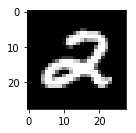

In [12]:
digit = X_test.reshape(X_test.shape[0],28,28)
print(ans[0])
plt.subplot(221)
plt.imshow(digit[i], cmap=plt.get_cmap('gray'))